<h2 style = "border:3px solid violet; , font:courier; text-align:center;">PREDICTING INSURANCE COSTS</h2>

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">1.IMPORTS</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
insurance=pd.read_csv('insurance.csv')

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;"> 2. EXPLORING THE DATASET <h3>

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<b>Correlations<b>

In [6]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


THIS CORRELATION CHART SHOWS US THE CORRELATIONS BETWEEN CHARGES AND FEATURES WHICH ARE NUMERICAL DATA.  WE WILL PLOT THE CORRELATION OF THE CATEGORICAL COLUMNS BELOW:

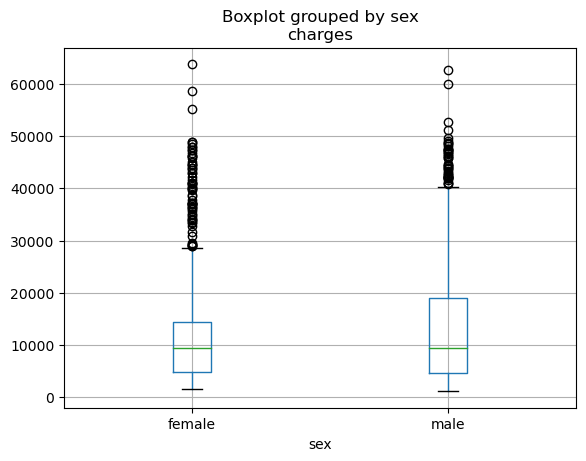

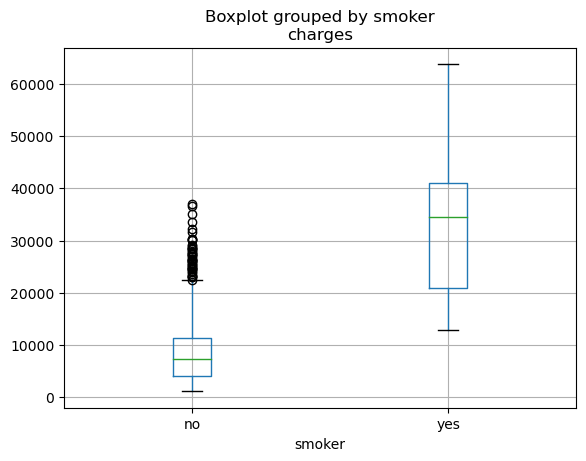

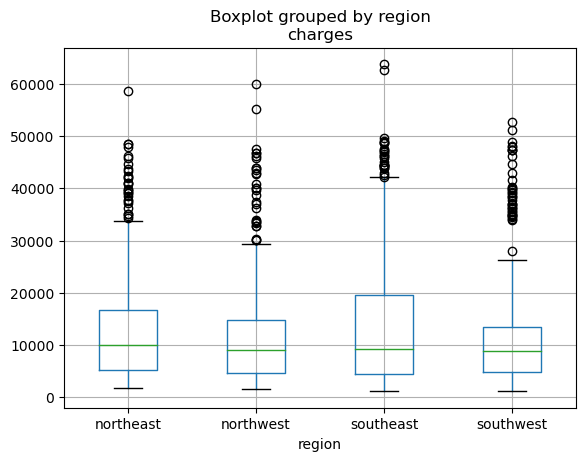

In [7]:
categorical = ['sex', 'smoker', 'region']
for c in categorical:
    insurance.boxplot(column='charges', by = c)
    plt.show()

CORRELATIONS OBSERVATIONS<P>
Age - Age has s 29.9% correlation to charges.  I will use this column.<P>
Sex - Not very significant correlation.  At first I left this column in the dataset.  I ran the model both with and without this column and the measures of model quality were almost exactly the same.  I therefore deleted the column (and reran the notebook, so you don't see that I originally ran with this column)<P>
BMI - Here we have a 19.8% correlation to charges.  I will use this column.<P>
Children very little correlation to charges, I will drop this column<P>
Smoker - This column has the most significant correlation to charges, this column will be used.<P>
Region - Very little correlation to charges, I will drop this column

In [8]:
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker'], drop_first=True)

In [9]:
insurance2=insurance.drop(['children', 'region', 'sex_male'], axis=1)

BELOW WE CAN SEE THE CORRELATIONS OF THE COLUMNS THAT WE WILL BE WORKING WITH IN OUR MODEL VS CHARGES:

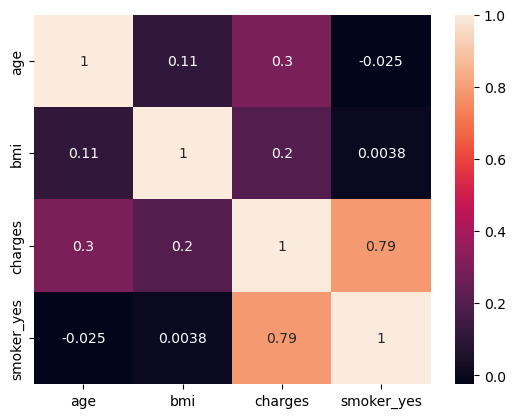

In [10]:
correlations = insurance2.corr()
sns.heatmap(correlations, annot=True)
plt.show()

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;"> 3. DIVIDING THE DATA </h3>

In [11]:
X=insurance2.drop(['charges'], axis=1)
y=insurance2.charges
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=39)

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">4. BUILDING THE MODEL</h3>

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
train_predictions = lr.predict(X_train)

In [13]:
MSE = mean_squared_error(y_train, train_predictions)
print(MSE)

36062088.23309275


In [14]:
RMSE = mean_squared_error(y_train, train_predictions, squared = False)
print(RMSE)

6005.171790473004


In [15]:
MAE=mean_absolute_error(y_train, train_predictions)
print(MAE)

4152.214100660888


In [16]:
lr.score(X_train, y_train)

0.7481142246196936

In [17]:
R2=r2_score(y_train, train_predictions)
R2

0.7481142246196936

THIS IS A PRETTY DECENT SCORE.  ALMOST 75% OF THE RESIDUALS CAN BE ATTRIBUTED TO THE MODEL. THE SCORES SEEM DECENT AS WELL. THE MODEL DEFINITELY NEEDS MORE FINE TUNING FOR IT TO BE A USEFUL MODEL.

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">5. RESIDUAL DIAGNOSTICS</h3>

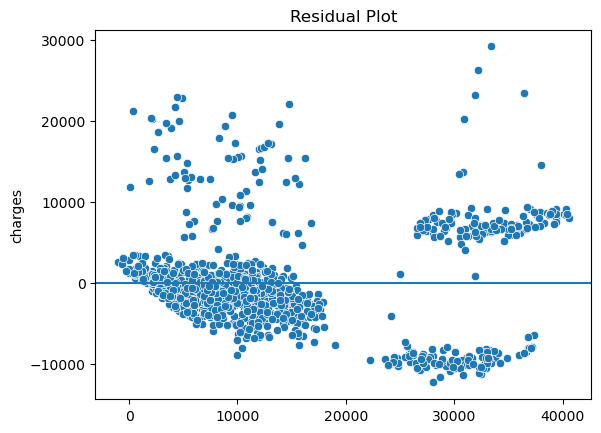

In [18]:
residuals=y_train-train_predictions
sns.scatterplot(x=train_predictions, y=residuals)
plt.axhline(y=0)
plt.title('Residual Plot')
plt.show()

Looking at the residual plot, it seems as majority of the residuals are closely banded around the 0 line.  Further to the right as they move farther from the 0, the residual values seem to equally group both as a positive and a negative residual - it's not skewed in one direction over the other.  There are outliers but it's pretty minimal in number compared to the number of datapoints in our dataset. I think all in all this would indicate a good model. 

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">6. INTERPERETING THE MODEL </h3>

In [19]:
lr.intercept_

-11477.113697800965

THE INTERCEPT HAS NO MEANING IN THIS CASE BECAUSE IT TAKES INTO ACCOUNT VALUES THAT CANNOT BE = 0, SUCH AS BMI.

In [20]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.rename({0:'Features'},axis=1) 

,Features,Coefs
0,age,258.262844
1,bmi,316.072742
2,smoker_yes,23621.735068


For each year of age, charge goes up $258.<P>
For each point of bmi, charge goes up $361.<P>
A smoker will pay $23621 more than a non-smoker (with other features the same)<P>
We are seeing here, as we saw above in our correlations visuals, that the strongest factor on insurance charges is whether or not a person smokes, followed by his bmi and age.  (In order to reach the correlation of a smoker, one would have to add many years to their age and points to their bmi - those correlations are significantly weaker than the smoking correlation.)

<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">7. FINAL MODEL EVALUATION</h3>

In [21]:
testpredict= lr.predict(X_test)

In [22]:
MSE_2 = mean_squared_error(y_test, testpredict)
print(MSE_2)

40857676.450243354


In [23]:
RMSE_2= mean_squared_error(y_test, testpredict, squared=False)
print(RMSE_2)
      


6392.000973892554


In [24]:
MAE_2= mean_absolute_error(y_test, testpredict)
print(MAE_2)


4380.845399212905


In [25]:
R2_2= r2_score(y_test, testpredict)
print(R2_2)

0.7445344706619692


<h3 style = "background-color: LightGray; color: Gray; font:georgia; text-align:center; weight:bold;">8.DRAWING CONCLUSIONS<B/h3>

The MSE of the training set was 36062088.23309275, which is about 13% lower than the MSE on our test data.
The RMSE of the training set was 6005.171790473004, about 6% difference from that of the test set.
The R squared of the test set was almost the same as that of the training set (74.4% vs 47.8%).

In general, the model was pretty good fit when comparing the training set and testing set.  However, it seems to underpredict the insurance costs and most of the outliers are quite high. I don't think that the model would be useful as it is; it's not accurate enough. I wonder if we can find some other common feature amongst those with significantly higher charges and implement that into the model as well.  